In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data\Zoo\zoo.data') #Leemos los datos

In [5]:
columns = ['animal','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']

In [6]:
df.columns = columns

In [7]:
df

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   animal    100 non-null    object
 1   hair      100 non-null    int64 
 2   feathers  100 non-null    int64 
 3   eggs      100 non-null    int64 
 4   milk      100 non-null    int64 
 5   airborne  100 non-null    int64 
 6   aquatic   100 non-null    int64 
 7   predator  100 non-null    int64 
 8   toothed   100 non-null    int64 
 9   backbone  100 non-null    int64 
 10  breathes  100 non-null    int64 
 11  venomous  100 non-null    int64 
 12  fins      100 non-null    int64 
 13  legs      100 non-null    int64 
 14  tail      100 non-null    int64 
 15  domestic  100 non-null    int64 
 16  catsize   100 non-null    int64 
 17  type      100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.2+ KB


In [9]:
df_corr = df.corr(method = 'pearson', numeric_only=True)

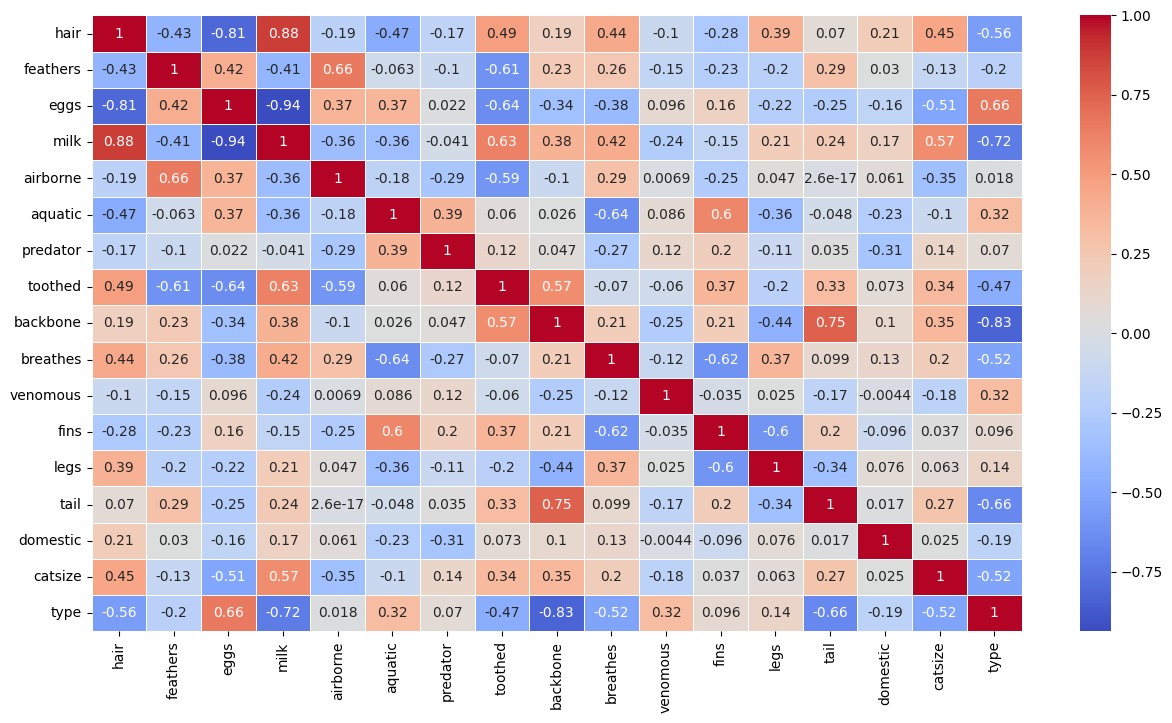

In [11]:
plt.figure(figsize=(15, 8))  # Establecer el tamaño deseado (ancho x alto)

g = sns.heatmap(df_corr,annot=True, cmap='coolwarm', linewidths=0.5)


plt.show()

In [18]:
from scipy import stats

#Esto nos dice si se distribuye hacia la derecha o izquierda lada variable

numeric_vars = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
# Check the skew of all numerical features
skewed_feats = df.loc[:,numeric_vars].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness.head())

              Skew
venomous  3.096281
domestic  2.200394
fins      1.757035
feathers  1.500000
airborne  1.217562


In [16]:
from scipy.special import boxcox1p #Librería
skewness = skewness.loc[abs(skewness.Skew) > 0.75,:] #Filtramos los que tengan un índice superior a .75
lambda_values = pd.Series(np.linspace(-2,2,40)) #Asignamos candidatos a índices de transformación
for var in skewness.index:
  skews = [stats.skew(boxcox1p(df[var], lam)) for lam in lambda_values]
  lam = lambda_values[pd.Series(np.abs(skews)).idxmin()] #Elegimos el índice óptimo
  df[var] = boxcox1p(df[var], lam)